# 1. Preprocesamiento

## 1.1 Carga de datos e importación de librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("Rendimiento-2022/20230209_Rendimiento_2022_20230131_WEB.csv", sep=";", encoding="utf-8")

C:\Users\matie\AppData\Local\Temp\ipykernel_27632\1194470308.py:8: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Rendimiento-2022/20230209_Rendimiento_2022_20230131_WEB.csv", sep=";", encoding="utf-8")


In [2]:
df.shape

(3405130, 37)

In [3]:
## Show all cols
pd.set_option('display.max_columns', None)
df

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,COD_ENSE,COD_ENSE2,COD_GRADO,LET_CUR,COD_JOR,COD_TIP_CUR,COD_DES_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,EDAD_ALU,COD_REG_ALU,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
0,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,3,A,4,0,1,459781,1,198107,40,15,15101,ARICA,400,410,41001,"6,6",98,P,P,0
1,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,3,A,4,0,1,974395,2,196702,55,15,15101,ARICA,400,410,41001,0,0,Y,T,0
2,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,3,A,4,0,1,1959596,1,197706,45,15,15101,ARICA,400,410,41001,0,0,Y,Y,0
3,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,3,A,4,0,1,2267103,2,200102,21,15,15101,ARICA,400,410,41001,0,0,Y,T,0
4,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,3,A,4,0,1,2306638,1,200309,18,15,15101,ARICA,400,410,41001,0,0,Y,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405125,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,3,A,1,0,0,25620942,1,200112,20,13,13201,PUENTE ALTO,0,0,0,0,100,,,0
3405126,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,785298,1,200411,17,13,13201,PUENTE ALTO,0,0,0,0,0,Y,T,0
3405127,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,3905129,2,200404,18,13,13122,PEÑALOLÉN,0,0,0,0,0,Y,T,0
3405128,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,13783110,1,200505,17,13,13112,LA PINTANA,0,0,0,0,0,Y,T,0


## 1.2 Busqueda de datos nulos

In [4]:
## How to see null values
df.isnull().sum()

AGNO              0
RBD               0
DGV_RBD           0
NOM_RBD           0
COD_REG_RBD       0
NOM_REG_RBD_A     0
COD_PRO_RBD       0
COD_COM_RBD       0
NOM_COM_RBD       0
COD_DEPROV_RBD    0
NOM_DEPROV_RBD    0
COD_DEPE          0
COD_DEPE2         0
RURAL_RBD         0
ESTADO_ESTAB      0
COD_ENSE          0
COD_ENSE2         0
COD_GRADO         0
LET_CUR           0
COD_JOR           0
COD_TIP_CUR       0
COD_DES_CUR       0
MRUN              0
GEN_ALU           0
FEC_NAC_ALU       0
EDAD_ALU          0
COD_REG_ALU       0
COD_COM_ALU       0
NOM_COM_ALU       0
COD_RAMA          0
COD_SEC           0
COD_ESPE          0
PROM_GRAL         0
ASISTENCIA        0
SIT_FIN           0
SIT_FIN_R         0
COD_MEN           0
dtype: int64

Debido a la gran cantidad de datos, tomaremos solo en cuenta educacion basica y media superior humanista y tecnica, por lo que filtraremos segun codigo de enseñanza.

## 1.3 Filtrado de datos por nivel educativo y tipo de educacion

In [5]:
df_1 = df[(df["COD_ENSE"] == 110) | (df["COD_ENSE"] == 310) | (df["COD_ENSE"] == 410) | (df["COD_ENSE"] == 510) | (df["COD_ENSE"] == 610) | (df["COD_ENSE"] == 710) | (df["COD_ENSE"] == 810)]
df_1


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,COD_ENSE,COD_ENSE2,COD_GRADO,LET_CUR,COD_JOR,COD_TIP_CUR,COD_DES_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,EDAD_ALU,COD_REG_ALU,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
19,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,599765,1,200804,14,4,4102,COQUIMBO,0,0,0,"4,5",85,P,P,0
20,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,1318200,1,200704,15,15,15101,ARICA,0,0,0,"5,1",89,P,P,0
21,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,3533695,1,200510,16,15,15101,ARICA,0,0,0,"5,3",89,P,P,0
22,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,3734858,2,200604,16,15,15101,ARICA,0,0,0,"5,9",90,P,P,0
23,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,4231164,1,200607,15,15,15101,ARICA,0,0,0,0,0,Y,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405125,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,3,A,1,0,0,25620942,1,200112,20,13,13201,PUENTE ALTO,0,0,0,0,100,,,0
3405126,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,785298,1,200411,17,13,13201,PUENTE ALTO,0,0,0,0,0,Y,T,0
3405127,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,3905129,2,200404,18,13,13122,PEÑALOLÉN,0,0,0,0,0,Y,T,0
3405128,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,13783110,1,200505,17,13,13112,LA PINTANA,0,0,0,0,0,Y,T,0


In [6]:
df_1.describe()

,AGNO,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,COD_ENSE,COD_ENSE2,COD_GRADO,COD_JOR,COD_TIP_CUR,COD_DES_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,COD_REG_ALU,COD_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,ASISTENCIA,COD_MEN
count,3251391.0,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06
mean,2022.0,1.145195e+04,4.452661e+00,9.435352e+00,9.628267e+01,9.634932e+03,9.487144e+01,2.839671e+00,1.948167e+00,8.052430e-02,1.000324e+00,1.904904e+02,3.108289e+00,3.853558e+00,2.603268e+00,2.741442e-02,6.380315e-02,1.427790e+07,1.488122e+00,2.009837e+05,9.504369e+00,9.700923e+03,2.781191e+01,2.920046e+01,2.920568e+03,8.089502e+01,1.344132e+06
std,0.0,8.935146e+03,2.877874e+00,4.001261e+00,3.980349e+01,3.983148e+03,3.936768e+01,1.113973e+00,9.687454e-01,2.721032e-01,2.539995e-02,1.326024e+02,1.705454e+00,2.229742e+00,7.677718e-01,2.229704e-01,2.865417e-01,8.114411e+06,4.998633e-01,3.568907e+02,4.018026e+00,4.000218e+03,1.179179e+02,1.238580e+02,1.238799e+04,2.627426e+01,8.495623e+06
min,2022.0,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.101000e+03,1.100000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+02,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,1.900010e+05,1.000000e+00,1.101000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2022.0,4.451000e+03,2.000000e+00,6.000000e+00,6.100000e+01,6.108000e+03,6.100000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+02,2.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,7.205725e+06,1.000000e+00,2.007050e+05,6.000000e+00,6.110000e+03,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e+01,0.000000e+00
50%,2022.0,9.673000e+03,4.000000e+00,1.000000e+01,1.010000e+02,1.010100e+04,9.200000e+01,3.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.100000e+02,2.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.441683e+07,1.000000e+00,2.010040e+05,1.000000e+01,1.010900e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01,0.000000e+00
75%,2022.0,1.645300e+04,7.000000e+00,1.300000e+01,1.310000e+02,1.312200e+04,1.340000e+02,3.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,3.100000e+02,5.000000e+00,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.162678e+07,2.000000e+00,2.013040e+05,1.300000e+01,1.312200e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+01,0.000000e+00
max,2022.0,4.213000e+04,9.000000e+00,1.600000e+01,1.630000e+02,1.630500e+04,1.510000e+02,6.000000e+00,5.000000e+00,1.000000e+00,3.000000e+00,8.100000e+02,7.000000e+00,8.000000e+00,4.000000e+00,6.000000e+00,3.000000e+00,2.714101e+07,2.000000e+00,2.021020e+05,1.600000e+01,1.630500e+04,8.000000e+02,8.100000e+02,8.100500e+04,1.000000e+02,7.200700e+07


Basado en el describe, solo algunas columnas deben ser normalizadas, pues, hay muchos datos categoricos, por lo que se procede a normalizarlos. Sin embargo, antes se eliminaran ciertas columnas que no aportan informacion relevante como el año.

## 1.4 Filtrado de columnas segun relevancia y filtrado de filas con promedio general 0 y asistencia 0, pues esa es la asistencia y prom general de alumnos retirados

In [7]:
df_1= df_1[(df_1["PROM_GRAL"] != "0") & (df_1["ASISTENCIA"] != "0")]
df_1

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,COD_ENSE,COD_ENSE2,COD_GRADO,LET_CUR,COD_JOR,COD_TIP_CUR,COD_DES_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,EDAD_ALU,COD_REG_ALU,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
19,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,599765,1,200804,14,4,4102,COQUIMBO,0,0,0,"4,5",85,P,P,0
20,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,1318200,1,200704,15,15,15101,ARICA,0,0,0,"5,1",89,P,P,0
21,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,3533695,1,200510,16,15,15101,ARICA,0,0,0,"5,3",89,P,P,0
22,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,3734858,2,200604,16,15,15101,ARICA,0,0,0,"5,9",90,P,P,0
24,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,4707139,1,200801,14,15,15101,ARICA,0,0,0,"5,7",90,P,P,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405079,2022,42081,6,ESCUELA HOSPITALARIA SANTA CRUZ,6,LGBO,63,6310,SANTA CRUZ,62,COLCHAGUA,3,2,0,1,310,5,2,A,1,0,0,21859315,1,200510,16,6,6304,LOLOL,0,0,0,6,85,P,P,0
3405081,2022,42081,6,ESCUELA HOSPITALARIA SANTA CRUZ,6,LGBO,63,6310,SANTA CRUZ,62,COLCHAGUA,3,2,0,1,310,5,3,A,1,0,0,5717717,1,200104,21,6,6105,DOÑIHUE,0,0,0,"6,6",90,P,P,0
3405084,2022,42081,6,ESCUELA HOSPITALARIA SANTA CRUZ,6,LGBO,63,6310,SANTA CRUZ,62,COLCHAGUA,3,2,0,1,310,5,3,A,1,0,0,13023637,2,200506,17,6,6310,SANTA CRUZ,0,0,0,"6,9",90,P,P,0
3405088,2022,42081,6,ESCUELA HOSPITALARIA SANTA CRUZ,6,LGBO,63,6310,SANTA CRUZ,62,COLCHAGUA,3,2,0,1,310,5,4,A,1,0,0,25734022,2,200406,18,6,6310,SANTA CRUZ,0,0,0,"6,4",90,P,P,0


In [8]:
df_2 = df_1[["COD_DEPE2", "COD_ENSE", "COD_JOR", "GEN_ALU", "EDAD_ALU" \
    , "PROM_GRAL", "ASISTENCIA", "SIT_FIN_R", "NOM_REG_RBD_A"]]

df_2

,COD_DEPE2,COD_ENSE,COD_JOR,GEN_ALU,EDAD_ALU,PROM_GRAL,ASISTENCIA,SIT_FIN_R,NOM_REG_RBD_A
19,5,510,1,1,14,"4,5",85,P,AYP
20,5,510,1,1,15,"5,1",89,P,AYP
21,5,510,1,1,16,"5,3",89,P,AYP
22,5,510,1,2,16,"5,9",90,P,AYP
24,5,510,1,1,14,"5,7",90,P,AYP
...,...,...,...,...,...,...,...,...,...
3405079,2,310,1,1,16,6,85,P,LGBO
3405081,2,310,1,1,21,"6,6",90,P,LGBO
3405084,2,310,1,2,17,"6,9",90,P,LGBO
3405088,2,310,1,2,18,"6,4",90,P,LGBO


Como se puede ver, hay personas con promedio general 0, lo cual, no tiene sentido, por lo que se eliminaran dichos datos.

In [9]:
## ELiminamos el año, el nombre del establecimiento, la mascara del alumno, la fecha de nacimiento del alumno y el digito verificador del rbd, debido a que no aportan informacion.
df_2_pca = df_1.drop(["COD_DEPE2", "NOM_COM_RBD", "NOM_DEPROV_RBD", "COD_ENSE", "COD_JOR", "GEN_ALU", "EDAD_ALU" \
    , "NOM_COM_ALU", "PROM_GRAL", "ASISTENCIA", "SIT_FIN_R","AGNO", "NOM_RBD", "DGV_RBD", "COD_DEPE", "SIT_FIN", "MRUN", "FEC_NAC_ALU", "NOM_REG_RBD_A", "LET_CUR"], axis=1)

df_2_pca

,RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,RURAL_RBD,ESTADO_ESTAB,COD_ENSE2,COD_GRADO,COD_TIP_CUR,COD_DES_CUR,COD_REG_ALU,COD_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,COD_MEN
19,1,15,151,15101,151,0,1,7,1,0,0,4,4102,0,0,0,0
20,1,15,151,15101,151,0,1,7,1,0,0,15,15101,0,0,0,0
21,1,15,151,15101,151,0,1,7,1,0,0,15,15101,0,0,0,0
22,1,15,151,15101,151,0,1,7,1,0,0,15,15101,0,0,0,0
24,1,15,151,15101,151,0,1,7,1,0,0,15,15101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405079,42081,6,63,6310,62,0,1,5,2,0,0,6,6304,0,0,0,0
3405081,42081,6,63,6310,62,0,1,5,3,0,0,6,6105,0,0,0,0
3405084,42081,6,63,6310,62,0,1,5,3,0,0,6,6310,0,0,0,0
3405088,42081,6,63,6310,62,0,1,5,4,0,0,6,6310,0,0,0,0


## 1.5 PCA

Ahora, con los datos obtenidos, utilizamos PCA para reducir la dimensionalidad de los datos.

In [10]:
# Import pca
from sklearn.decomposition import PCA
pca = PCA(n_components=17)
# Create a PCA instance: pca (Maintaining 95% of the variance)
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i


pca.fit(df_2_pca)

PCA(n_components=17)

In [11]:
min_var(0.99,pca.explained_variance_ratio_)

1

Con una sola columna se pueden mantener la mayoria de los datos

In [12]:
pca = PCA(n_components=1)
df_3_pca = pca.fit_transform(df_2_pca)

In [13]:
df_3_pca

array([[-1300996.23330108],
       [-1300996.26670672],
       [-1300996.26670672],
       ...,
       [-1300997.48840672],
       [-1300997.48840672],
       [-1300997.52967233]])

In [14]:
df_4_pca = pd.DataFrame(df_3_pca, columns=["PCA_1"])

In [15]:
## Concatenate the df_2 with the df_3_pca using pd.concat
df_3 = pd.concat([df_2, df_4_pca], axis=1)

In [16]:
## Hay algunos datos de EDAD_ALU que son strings del tipo '' y ' ', por lo que los reemplazaremos por nulos
df_3["EDAD_ALU"] = df_3["EDAD_ALU"].replace('', np.nan)
df_3["EDAD_ALU"] = df_3["EDAD_ALU"].replace(' ', np.nan)

In [17]:
# Revisamos datos nulos
df_3.isnull().sum()

COD_DEPE2        354676
COD_ENSE         354676
COD_JOR          354676
GEN_ALU          354676
EDAD_ALU         354768
PROM_GRAL        354676
ASISTENCIA       354676
SIT_FIN_R        354676
NOM_REG_RBD_A    354676
PCA_1            354676
dtype: int64

In [18]:
## Removemos datos nulos
df_3 = df_3.dropna()
df_3

,COD_DEPE2,COD_ENSE,COD_JOR,GEN_ALU,EDAD_ALU,PROM_GRAL,ASISTENCIA,SIT_FIN_R,NOM_REG_RBD_A,PCA_1
19,5.0,510.0,1.0,1.0,14,"4,5",85.0,P,AYP,-1.300996e+06
20,5.0,510.0,1.0,1.0,15,"5,1",89.0,P,AYP,-1.300996e+06
21,5.0,510.0,1.0,1.0,16,"5,3",89.0,P,AYP,-1.300996e+06
22,5.0,510.0,1.0,2.0,16,"5,9",90.0,P,AYP,-1.300996e+06
24,5.0,510.0,1.0,1.0,14,"5,7",90.0,P,AYP,-1.300996e+06
...,...,...,...,...,...,...,...,...,...,...
2985122,2.0,110.0,3.0,2.0,10,"6,5",96.0,P,RM,-1.300997e+06
2985123,2.0,110.0,3.0,1.0,9,"5,6",86.0,P,RM,-1.300997e+06
2985124,2.0,110.0,3.0,1.0,9,"6,5",96.0,P,RM,-1.300997e+06
2985125,2.0,110.0,3.0,2.0,10,"5,4",93.0,P,RM,-1.300997e+06


## 1.6 Cambio de separador decimal de coma a punto.

Vemos que los promedios generales usan comas, sin embargo, la mayoria de librerias usan puntos como separador decimal, por lo que se reemplazaran las comas por puntos.

In [19]:
df_3["PROM_GRAL"] = df_3["PROM_GRAL"].str.replace(",", ".")
df_3["PROM_GRAL"] = df_3["PROM_GRAL"].astype(float)

## 1.7 Normalizacion de ciertas columnas

In [20]:
## Using minmaxscaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_3["ASISTENCIA"] = scaler.fit_transform(df_3[["ASISTENCIA"]])
df_3["EDAD_ALU"] = scaler.fit_transform(df_3[["EDAD_ALU"]])
df_3["PCA_1"] = scaler.fit_transform(df_3[["PCA_1"]])

In [21]:
df_3

,COD_DEPE2,COD_ENSE,COD_JOR,GEN_ALU,EDAD_ALU,PROM_GRAL,ASISTENCIA,SIT_FIN_R,NOM_REG_RBD_A,PCA_1
19,5.0,510.0,1.0,1.0,0.192982,4.5,0.85,P,AYP,1.773079e-08
20,5.0,510.0,1.0,1.0,0.210526,5.1,0.89,P,AYP,1.773079e-08
21,5.0,510.0,1.0,1.0,0.228070,5.3,0.89,P,AYP,1.773079e-08
22,5.0,510.0,1.0,2.0,0.228070,5.9,0.90,P,AYP,1.773079e-08
24,5.0,510.0,1.0,1.0,0.192982,5.7,0.90,P,AYP,1.773079e-08
...,...,...,...,...,...,...,...,...,...,...
2985122,2.0,110.0,3.0,2.0,0.122807,6.5,0.96,P,RM,7.646420e-10
2985123,2.0,110.0,3.0,1.0,0.105263,5.6,0.86,P,RM,7.730359e-10
2985124,2.0,110.0,3.0,1.0,0.105263,6.5,0.96,P,RM,7.643889e-10
2985125,2.0,110.0,3.0,2.0,0.122807,5.4,0.93,P,RM,7.643888e-10


# 2. Visualizacion de los datos

## 2.1. Matriz de correlacion

C:\Users\matie\AppData\Local\Temp\ipykernel_27632\1941367704.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_3.corr()


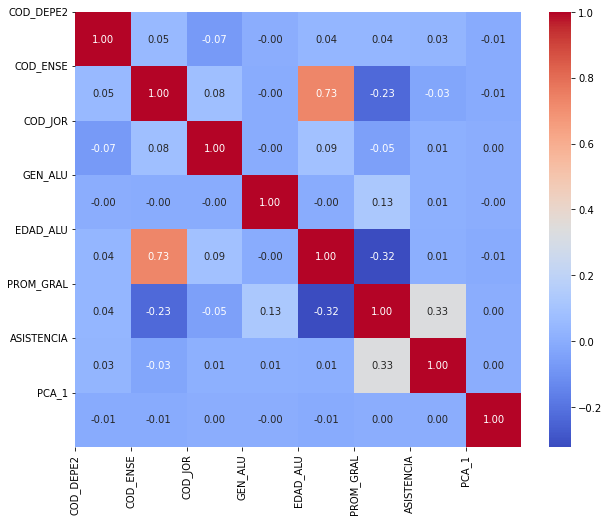

In [22]:
corr = df_3.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

## 2.2. Grafico de puntos de promedio general vs asistencia

In [23]:
data_sample = df_3.sample(n=10000, random_state=42)

El gráfico muesta la relación directa que tiene la asistencia con el promedio anual del alumno (relación que parece importante por el heatmap), además se muestra la distribución de cada variable por separado.

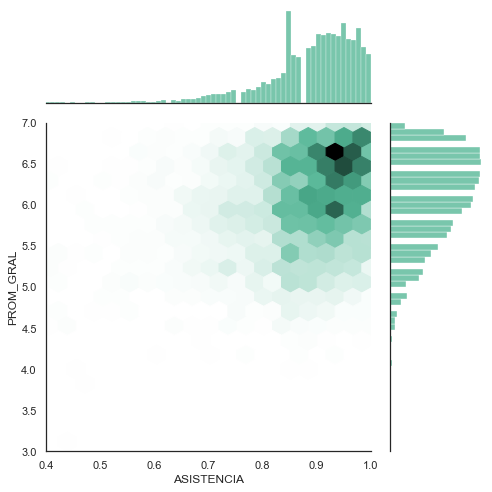

In [74]:
sns.jointplot(x="ASISTENCIA", y="PROM_GRAL",kind="hex", joint_kws=dict(gridsize=30), data=data_sample,height=7, ratio=3, color="#4CB391")
plt.ylim(3, 7)
plt.xlim(0.4, 1)
plt.show()

## 2.3. Histograma de promedio general vs tipo de jornada

In [25]:
data_sample['COD_JOR'] = pd.to_numeric(data_sample['COD_JOR'], errors='coerce')
data_sample['COD_JOR'] = data_sample['COD_JOR'].astype(float)

In [26]:
data_sample_avg = data_sample.groupby('COD_JOR').mean()["PROM_GRAL"]

C:\Users\matie\AppData\Local\Temp\ipykernel_27632\4105789679.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_sample_avg = data_sample.groupby('COD_JOR').mean()["PROM_GRAL"]


En el siguiente gráfico muestra el promedio general de cada jornada junto a la proporción entre los alumnos que aprobaron y que reprobaron.

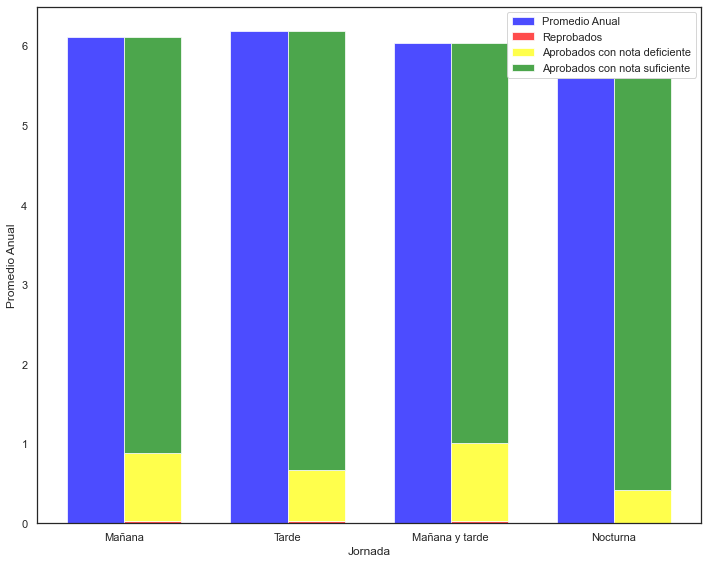

In [103]:
import numpy as np

#Aca agrupo los estudiantes por sus notas y jornadas.
grouped_data = df_3.groupby('COD_JOR')['PROM_GRAL'].apply(lambda x: np.histogram(x, bins=[0, 4.0, 5.5, 7.0])[0] / len(x))
failure_proportions = grouped_data.apply(lambda x: x[0])
defficient_proportions = grouped_data.apply(lambda x: x[1])
pass_proportions = grouped_data.apply(lambda x: x[2])

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.7
index = np.arange(len(data_sample_avg))


fig.set_size_inches(10, 8)


rects1 = ax.bar(index, data_sample_avg.values, bar_width, alpha=opacity, color='blue', label='Promedio Anual')
rects2 = ax.bar(index + bar_width, failure_proportions * data_sample_avg.values, bar_width, alpha=opacity, color='red', label='Reprobados')
rects3 = ax.bar(index + bar_width, defficient_proportions * data_sample_avg.values, bar_width, bottom=failure_proportions * data_sample_avg.values, alpha=opacity, color='yellow', label='Aprobados con nota deficiente')
rects4 = ax.bar(index + bar_width, pass_proportions * data_sample_avg.values, bar_width, bottom=(failure_proportions + defficient_proportions) * data_sample_avg.values, alpha=opacity, color='green', label='Aprobados con nota suficiente')

plt.xlabel('Jornada')
plt.ylabel('Promedio Anual')

x_labels = {
    0: 'Mañana',
    1: 'Tarde',
    2: 'Mañana y tarde',
    3: 'Nocturna'
}
plt.xticks(index + bar_width/2, [x_labels.get(label) for label in data_sample_avg.index - 1])

plt.legend()

plt.tight_layout()
plt.show()




In [28]:
# ## Clustering mediante TSNE
# X = df_3.drop(["PROM_GRAL", "NOM_RBD", "NOM_COM_ALU"], axis=1)

# ## Take only 10000 rows of X
# X_1 = X.sample(n=10000, random_state=42)

# encoded_data = pd.get_dummies(X_1, columns=["COD_DEPE2", "RURAL_RBD", "ESTADO_ESTAB", "COD_ENSE", "COD_GRADO", "COD_JOR", "GEN_ALU", "SIT_FIN_R"]) 
# encoded_data = encoded_data.apply(pd.to_numeric, errors='coerce')
# encoded_data_1 = encoded_data.dropna()
# y = df_3["PROM_GRAL"]
# tsne = TSNE(n_components=2, random_state=42)
# data_tsne = tsne.fit_transform(encoded_data_1)
# kmeans = KMeans(n_clusters=3, random_state=42)
# clusters = kmeans.fit_predict(data_tsne)


In [29]:
# plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters)
# plt.title("t-SNE Clustering")
# plt.show()


# 3. Modelos de prediccion de promedio general

## 3.1 Creacion nueva columna "Estado_notas"

In [30]:
## Creamos la nueva columna "ESTADO_NOTAS" que tendra 2 estados (1: Aprobado, 0: Reprobado), este sera 1 si ["PROM_GRAL"] > 4.0, 0 en caso contrario
df_3["ESTADO_NOTAS"] = np.where(df_3["PROM_GRAL"] >= 4.0, 1, 0)

In [31]:
df_3

,COD_DEPE2,COD_ENSE,COD_JOR,GEN_ALU,EDAD_ALU,PROM_GRAL,ASISTENCIA,SIT_FIN_R,NOM_REG_RBD_A,PCA_1,ESTADO_NOTAS
19,5.0,510.0,1.0,1.0,0.192982,4.5,0.85,P,AYP,1.773079e-08,1
20,5.0,510.0,1.0,1.0,0.210526,5.1,0.89,P,AYP,1.773079e-08,1
21,5.0,510.0,1.0,1.0,0.228070,5.3,0.89,P,AYP,1.773079e-08,1
22,5.0,510.0,1.0,2.0,0.228070,5.9,0.90,P,AYP,1.773079e-08,1
24,5.0,510.0,1.0,1.0,0.192982,5.7,0.90,P,AYP,1.773079e-08,1
...,...,...,...,...,...,...,...,...,...,...,...
2985122,2.0,110.0,3.0,2.0,0.122807,6.5,0.96,P,RM,7.646420e-10,1
2985123,2.0,110.0,3.0,1.0,0.105263,5.6,0.86,P,RM,7.730359e-10,1
2985124,2.0,110.0,3.0,1.0,0.105263,6.5,0.96,P,RM,7.643889e-10,1
2985125,2.0,110.0,3.0,2.0,0.122807,5.4,0.93,P,RM,7.643888e-10,1


## 3.2. Encoding y train-test split

In [32]:
## Import linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Import clasification report
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

In [33]:
encoded_df = pd.get_dummies(df_3, columns=["COD_DEPE2", "COD_ENSE", "COD_JOR", "GEN_ALU", "SIT_FIN_R", "NOM_REG_RBD_A" ]) 
## Replace commas with dots in PROM_GRAL
encoded_df_1 = encoded_df.apply(pd.to_numeric, errors='coerce')
encoded_df_1

,EDAD_ALU,PROM_GRAL,ASISTENCIA,PCA_1,ESTADO_NOTAS,COD_DEPE2_1.0,COD_DEPE2_2.0,COD_DEPE2_3.0,COD_DEPE2_4.0,COD_DEPE2_5.0,COD_ENSE_110.0,COD_ENSE_310.0,COD_ENSE_410.0,COD_ENSE_510.0,COD_ENSE_610.0,COD_ENSE_710.0,COD_ENSE_810.0,COD_JOR_1.0,COD_JOR_2.0,COD_JOR_3.0,COD_JOR_4.0,GEN_ALU_0.0,GEN_ALU_1.0,GEN_ALU_2.0,SIT_FIN_R_,SIT_FIN_R_P,SIT_FIN_R_R,SIT_FIN_R_T,SIT_FIN_R_Y,NOM_REG_RBD_A_ANTOF,NOM_REG_RBD_A_ARAUC,NOM_REG_RBD_A_ATCMA,NOM_REG_RBD_A_AYP,NOM_REG_RBD_A_AYSEN,NOM_REG_RBD_A_BBIO,NOM_REG_RBD_A_COQ,NOM_REG_RBD_A_LAGOS,NOM_REG_RBD_A_LGBO,NOM_REG_RBD_A_MAG,NOM_REG_RBD_A_MAULE,NOM_REG_RBD_A_NUBLE,NOM_REG_RBD_A_RIOS,NOM_REG_RBD_A_RM,NOM_REG_RBD_A_TPCA,NOM_REG_RBD_A_VALPO
19,0.192982,4.5,0.85,1.773079e-08,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
20,0.210526,5.1,0.89,1.773079e-08,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
21,0.228070,5.3,0.89,1.773079e-08,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
22,0.228070,5.9,0.90,1.773079e-08,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
24,0.192982,5.7,0.90,1.773079e-08,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985122,0.122807,6.5,0.96,7.646420e-10,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2985123,0.105263,5.6,0.86,7.730359e-10,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2985124,0.105263,6.5,0.96,7.643889e-10,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2985125,0.122807,5.4,0.93,7.643888e-10,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 3.2.1 Train-test split

In [34]:
## Split data using traiin_test_split

x_train, x_test, y_train, y_test = train_test_split(encoded_df_1.drop(["PROM_GRAL", "ESTADO_NOTAS"], axis=1), encoded_df_1["ESTADO_NOTAS"], test_size=0.1, random_state=42, stratify=encoded_df_1["ESTADO_NOTAS"])

In [35]:
## Create data of train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

## 3.2. Regresion lineal

### 3.2.1. Tomamos una muestra de 50000 datos para entrenar y validar el modelo

In [36]:
## Take a random sample of x_train, y_train, x_val, y_val
x_train_failed = x_train[y_train == 0]
y_train_failed = y_train[y_train == 0]
x_train_passed = x_train[y_train == 1]
y_train_passed = y_train[y_train == 1]

In [37]:
x_train_sample = pd.concat([x_train_failed, x_train_passed.sample(n=30000, random_state=42)])
## Now, we want a sample of all the rows of y_train_passed that is related to the values of x_train_passed
y_train_sample = y_train[x_train_sample.index]
y_train_sample

682977     0
1840572    0
671380     0
1411931    0
580297     0
          ..
1341119    1
1385220    1
2781165    1
244586     1
479071     1
Name: ESTADO_NOTAS, Length: 40880, dtype: int32

In [38]:
## Now we define a sample of x_val and y_val
x_val_sample = x_val.sample(n=10000, random_state=42)
y_val_sample = y_val[x_val_sample.index]

In [39]:
clf = LinearRegression()
clf.fit(x_train_sample, y_train_sample)
clf.score(x_val_sample, y_val_sample)

y_pred_1 = clf.predict(x_val_sample)


In [40]:
y_pred_1 = np.where(y_pred_1 >= 0.5, 1, 0)

In [41]:
print(classification_report(y_val_sample, y_pred_1))

              precision    recall  f1-score   support

           0       0.30      0.98      0.45        46
           1       1.00      0.99      0.99      9954

    accuracy                           0.99     10000
   macro avg       0.65      0.98      0.72     10000
weighted avg       1.00      0.99      0.99     10000



Se mejoraria usando gmm?

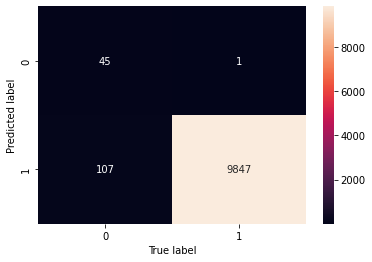

In [42]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val_sample, y_pred_1)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

## 3.3. Perceptron Multilayer


In [43]:
from keras.callbacks import Callback

class EarlyStoppingByLossAndAcc(Callback):
    def __init__(self, monitor='val_loss', patience=0):
        super(EarlyStoppingByLossAndAcc, self).__init__()
        self.monitor = monitor
        self.patience = patience
        self.best_weights = None
        self.wait = 0
        self.stopped_epoch = 0
        self.best = np.Inf
        self.best_acc = 0.0
        self.wait_acc = 0

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        current_acc = logs.get('val_accuracy')
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.best and current_acc > self.best_acc:
            self.best = current
            self.best_acc = current_acc
            self.wait = 0
            self.wait_acc = 0
            self.best_weights = self.model.get_weights()
        elif current_acc < self.best_acc and current >= self.best:
            self.wait_acc += 1
            if self.wait_acc >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print(f"Early stopping due to no improvement in accuracy after {self.patience} epochs.")
        elif current_acc >= self.best_acc and current >= self.best:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print(f"Early stopping due to no improvement in loss after {self.patience} epochs.")


In [44]:
x_train.shape

(2130595, 43)

In [45]:
# # import to_categorical
# from keras.utils import to_categorical
# y_train_onehot = 

In [46]:
# from keras.models import Sequential, Model
# from keras.layers import Dense, Embedding, Input

# from keras.models import Sequential
# from keras.layers import Dense, Input
# from tensorflow import keras

# # Define the input shape
# input_shape = (383,) # assuming 10 features of type int

# # Define the number of classes
# num_classes = 70 # for example

# # Create the model
# model = Sequential()

# # Add the input layer
# model.add(Dense(units=256, activation='relu', input_shape=input_shape))

# # Add one or more hidden layers
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=64, activation='relu'))
# model.add(Dense(units=32, activation='relu'))

# # Add the output layer
# model.add(Dense(units=num_classes, activation='softmax'))

# # Compile the model
# opt = keras.optimizers.legacy.Adam()
# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# callback = EarlyStoppingByLossAndAcc(monitor='val_loss', patience=3)

# # Train the model
# model.fit(x_train, y_train, epochs=80, batch_size=32, validation_data=(x_val, y_val), callbacks=[callback])

## 3.4. Decision Tree

# 4. Modelo de prediccion de la situacion de promocion al finalizar el año escolar.

# 5. Ensembles

# 6. Modelo de deep learning

In [47]:
## We import the model of fast ai
from fastai.tabular.all import *


ModuleNotFoundError: No module named 'fastai'

In [ ]:
## Concat x_train_sample and y_train_sample
df_train = pd.concat([x_train_sample, y_train_sample], axis=1)

In [ ]:
df_train

,EDAD_ALU,ASISTENCIA,PCA_1,COD_DEPE2_1.0,COD_DEPE2_2.0,COD_DEPE2_3.0,COD_DEPE2_4.0,COD_DEPE2_5.0,COD_ENSE_110.0,COD_ENSE_310.0,COD_ENSE_410.0,COD_ENSE_510.0,COD_ENSE_610.0,COD_ENSE_710.0,COD_ENSE_810.0,COD_JOR_1.0,COD_JOR_2.0,COD_JOR_3.0,COD_JOR_4.0,GEN_ALU_0.0,GEN_ALU_1.0,GEN_ALU_2.0,SIT_FIN_R_,SIT_FIN_R_P,SIT_FIN_R_R,SIT_FIN_R_T,SIT_FIN_R_Y,NOM_REG_RBD_A_ANTOF,NOM_REG_RBD_A_ARAUC,NOM_REG_RBD_A_ATCMA,NOM_REG_RBD_A_AYP,NOM_REG_RBD_A_AYSEN,NOM_REG_RBD_A_BBIO,NOM_REG_RBD_A_COQ,NOM_REG_RBD_A_LAGOS,NOM_REG_RBD_A_LGBO,NOM_REG_RBD_A_MAG,NOM_REG_RBD_A_MAULE,NOM_REG_RBD_A_NUBLE,NOM_REG_RBD_A_RIOS,NOM_REG_RBD_A_RM,NOM_REG_RBD_A_TPCA,NOM_REG_RBD_A_VALPO,ESTADO_NOTAS
682977,0.192982,0.19,1.604093e-08,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1840572,0.210526,0.46,1.427586e-08,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
671380,0.263158,0.19,1.608972e-08,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1411931,0.245614,0.66,1.398997e-08,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
580297,0.228070,0.21,1.710774e-08,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341119,0.087719,0.79,1.448825e-08,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1385220,0.070175,0.93,1.403945e-08,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2781165,0.175439,0.96,7.068167e-09,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
244586,0.175439,0.84,1.767566e-08,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
## We split the data of df_3 to be used in deep learning model

# Define your DataFrame (df_train) and target variable name ("ESTADO_NOTAS")

# Create data splits
splits = RandomSplitter()(df_train)

# Set up TabularPandas
procs = [Categorify, FillMissing]
y_names = "ESTADO_NOTAS"
y_block = CategoryBlock()
dls = TabularPandas(df_train, procs=procs, y_names=y_names, y_block=y_block, splits=splits).dataloaders(path=".")

# Create a tabular learner
learn = tabular_learner(dls, metrics=accuracy)

# Train your model
learn.fit(5)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


epoch,train_loss,valid_loss,accuracy,time


UnboundLocalError: local variable 'x' referenced before assignment